In [1]:
import pandas as pd

# Define the column names manually
column_names = ['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining', 'Reservation', 'Type', 'WaitEstimate', 'Wait']

# Provide the full path to the dataset
file_path = r'restaurant.csv'

# Load the dataset without a header
data = pd.read_csv(file_path, header=None, names=column_names)

print("First few rows of the dataset:")
print(data.head())
print("\nDataset tail:")
print(data.tail())
print("\nDataset shape:")
print(data.shape)
print("\nDataset info:")
print(data.info())
print("\nNull values in dataset:")
print(data.isnull().sum())


First few rows of the dataset:
  Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
0       Yes   No      No    Yes     NaN   $$$      No         Yes   French   
1        No  Yes     Yes    Yes    Some     $      No          No     Thai   
2       Yes   No      No     No    Full    $$     Yes         Yes   Burger   
3       Yes   No     Yes    Yes    Full   $$$      No          No  Italian   
4        No  Yes      No     No    Some     $     Yes         Yes   Burger   

  WaitEstimate Wait  
0         0-10   No  
1        10-30  Yes  
2        30-60  Yes  
3          >60   No  
4        10-30  Yes  

Dataset tail:
   Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
7         No  Yes      No     No     NaN     $     Yes          No  Italian   
8        Yes  Yes     Yes    Yes    Some    $$      No          No   French   
9        Yes  Yes     Yes    Yes    Full   $$$     Yes         Yes  Italian   
10        No   No      No     No     

In [8]:
# Assume 'Wait' is the target variable and all other columns are features
target_variable = 'Wait'

# Split the data into features (X) and target (y)
X = data.drop(columns=[target_variable])
y = data[target_variable]

print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())



Features (X):
  Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
0       Yes   No      No    Yes     NaN   $$$      No         Yes   French   
1        No  Yes     Yes    Yes    Some     $      No          No     Thai   
2       Yes   No      No     No    Full    $$     Yes         Yes   Burger   
3       Yes   No     Yes    Yes    Full   $$$      No          No  Italian   
4        No  Yes      No     No    Some     $     Yes         Yes   Burger   

  WaitEstimate  
0         0-10  
1        10-30  
2        30-60  
3          >60  
4        10-30  

Target (y):
0     No
1    Yes
2    Yes
3     No
4    Yes
Name: Wait, dtype: object


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (9, 10)
X_test shape: (3, 10)
y_train shape: (9,)
y_test shape: (3,)


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

print("\nPreprocessed Features (X):")
print(pd.DataFrame(X_preprocessed).head())



Preprocessed Features (X):
    0    1    2    3    4    5    6    7    8    9   ...   16   17   18   19  \
0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  1.0   
1  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  1.0  0.0   
3  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  1.0  0.0   

    20   21   22   23   24   25  
0  0.0  0.0  1.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  1.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 26 columns]



Training Data Accuracy: 100.0 %
Test Data Accuracy: 100.0 %

Confusion Matrix:
[[2 0]
 [0 1]]


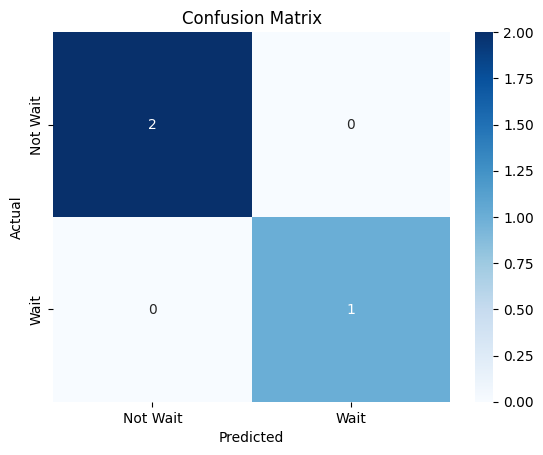


True Negatives: 2
False Positives: 0
False Negatives: 0
True Positives: 1


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=2)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accurac y scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nTraining Data Accuracy:", round(train_accuracy * 100, 2), "%")
print("Test Data Accuracy:", round(test_accuracy * 100, 2), "%")

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cf_matrix)

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Wait', 'Wait'], yticklabels=['Not Wait', 'Wait'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics from the confusion matrix
tn, fp, fn, tp = cf_matrix.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


In [12]:
# Extract true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cf_matrix.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")



True Negatives: 2
False Positives: 0
False Negatives: 0
True Positives: 1


In [13]:
TP = 1
FP = 0
FN = 0

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")


Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [14]:
TN = 2

accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0

print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()


NameError: name 'clf' is not defined

<Figure size 2000x1000 with 0 Axes>